This is a cleaning project carried out by Eboigbe Endurance Ikponmwosa.  

Seven datasets of house rents is various states in Nigeria were downloaded ([Here](https://www.kaggle.com/duoarc/rent-listings-in-nigeria/version/1#prop24.csv)) from kaggle.com and cleaned for analysis.


importing required libraries and reading data from cvs files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing_2 = pd.read_csv("naijapropfind.csv")
housing_3 = pd.read_csv("naijaprop.csv")
housing_4 = pd.read_csv("prop24.csv")
housing_5 = pd.read_csv("propexp.csv")
housing_6 = pd.read_csv("renting.csv")
housing_7 = pd.read_csv("trovit.csv")
housing_1 = pd.read_csv("findnigprop.csv")

## Inspecting the Datasets

In [3]:
housing_1.head()

,price,unit,location,bedrooms,baths,state
0,"₦2,620,000.00 Per Year","₦2,620,000.00 Per Year",", 7 obasa street, Oba-Akran, Ikeja, Lagos, Nig...",NaN,NaN,NaN
1,"₦2,500,000.00","₦2,500,000.00",", Tudu wada, Karshi,, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
2,"₦300,000.00","₦300,000.00",", ukeh, masaka, mararba, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
3,per month,per month,", World Trade Center Commercial Tower, Plot 11...",NaN,NaN,NaN
4,,,", World Trade Center, Plot 1113, Constitution ...",2.0,NaN,NaN


In [4]:
housing_1 = pd.read_csv("findnigprop.csv")

In [5]:
housing_1.head()

,price,unit,location,bedrooms,baths,state
0,"₦2,620,000.00 Per Year","₦2,620,000.00 Per Year",", 7 obasa street, Oba-Akran, Ikeja, Lagos, Nig...",NaN,NaN,NaN
1,"₦2,500,000.00","₦2,500,000.00",", Tudu wada, Karshi,, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
2,"₦300,000.00","₦300,000.00",", ukeh, masaka, mararba, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
3,per month,per month,", World Trade Center Commercial Tower, Plot 11...",NaN,NaN,NaN
4,,,", World Trade Center, Plot 1113, Constitution ...",2.0,NaN,NaN


In [6]:
housing_2.head()

,price,unit,location,bedrooms,baths,state
0,"₦1,200,000",per Year,"Enugu,Enugu North,NIGERIA",3,4,NaN
1,"₦600,000",per Year,"Enugu,Enugu East,NIGERIA",2,2,NaN
2,"₦500,000",per Year,"Enugu,Enugu North,NIGERIA",3,3,NaN
3,"₦400,000",per Year,"Enugu,Enugu North,NIGERIA",2,2,NaN
4,"₦800,000",per Year,"Enugu,Enugu East,NIGERIA",3,3,NaN


In [7]:
housing_3.head()

,price,unit,location,bedrooms,baths,state
0,"1,000,000",per Year,"15 - 17 Bolaji Balogun Street, Ayonusi Estate,...",5.0,6.0,Lagos
1,"600,000",per Year,"15 - 17 Bolaji Balogun Street, Ayonusi Estate,...",3.0,3.0,Lagos
2,"250,000",per Year,"badore,owode and addo roads,",1.0,1.0,Lagos
3,"1,000,000",per Year,"ilupeju,",3.0,2.0,Lagos
4,"600,000",per Year,"badore road,",NaN,NaN,Lagos


In [8]:
housing_4.head()

,price,unit,location,bedrooms,baths,parking_lots,state
0,\r\r\n ₦ 8 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"1c Fatai Durosinmi-Etiti Cres, Lagos Island We...",5.0,4,1,Lagos
1,\r\r\n ₦ 3 200 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"IKOTA, Lekki, Lekki",4.0,4,NaN,Lagos
2,\r\r\n ₦ 2 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"IKATE, Lekki, Lekki",2.0,2,NaN,Lagos
3,\r\r\n ₦ 2 500 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"ONIRU, Victoria Island, Lekki",3.0,3,NaN,Lagos
4,\r\r\n ₦ 18 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"BANANA ISLAND ESTATE, Ikoyi-obalende, Ikoyi-ob...",3.0,3,NaN,Lagos


In [9]:
housing_5.head()

,price,unit,location,bedrooms,baths,parking_lots,state
0,"₦4,500,000",per year,"Ikoyi, Lagos",2,2,NaN,"Ikoyi, Lagos"
1,"₦15,000,000",per year,"Ikoyi, Lagos",4,4,NaN,"Ikoyi, Lagos"
2,"₦15,000,000",per year,"Ikoyi, Lagos",3,4,NaN,"Ikoyi, Lagos"
3,"₦6,000,000",per year,"Ikoyi, Lagos",2,2,NaN,"Ikoyi, Lagos"
4,"₦13,000,000",per year,"Ikoyi, Lagos",3,4,NaN,"Ikoyi, Lagos"


In [10]:
housing_6.head()

,price,unit,location,bedrooms,baths,state
0,"₦ 5,000 / Per Event","₦ 5,000 / Per Event",LAGOS/Ikeja,NaN,NaN,NaN
1,"₦ 45,000 / Yearly","₦ 45,000 / Yearly",ABUJA (FCT)/Dutse Makaranta,1.0,NaN,NaN
2,"₦ 45,000 / Yearly","₦ 45,000 / Yearly",ABUJA (FCT)/Dutse Makaranta,1.0,NaN,NaN
3,"₦ 50,000 / Yearly","₦ 50,000 / Yearly",ABUJA (FCT)/Dutse Sokale,1.0,NaN,NaN
4,"₦ 65,000 / Yearly","₦ 65,000 / Yearly",ABUJA (FCT)/Dutse Alhaji,1.0,NaN,NaN


In [11]:
housing_7.head()

,price,unit,location,bedrooms,baths,state
0,"₦450,000",per Year,"Ogun, Odeda, Ogun State",2,2,NaN
1,"₦150,000",per Year,"Abeokuta, Abeokuta South, Ogun State",1,1,NaN
2,"₦700,000",per Year,"Ogun, Odeda, Ogun State",3,3,NaN
3,"₦250,000",per Year,"Ifo, Ogun State",2,2,NaN
4,"₦200,000",per Year,"Ofada, Obafemi Owode, Ogun State",NaN,NaN,NaN


 # Looking into the 1st Dataset more closely and cleaning

In [12]:
housing_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 6 columns):
price       752 non-null object
unit        752 non-null object
location    752 non-null object
bedrooms    620 non-null float64
baths       437 non-null object
state       0 non-null float64
dtypes: float64(2), object(4)
memory usage: 35.3+ KB


3 columns (bedrooms, baths and states) have missing values. Visualization of the data set using seaborn heatmap is done

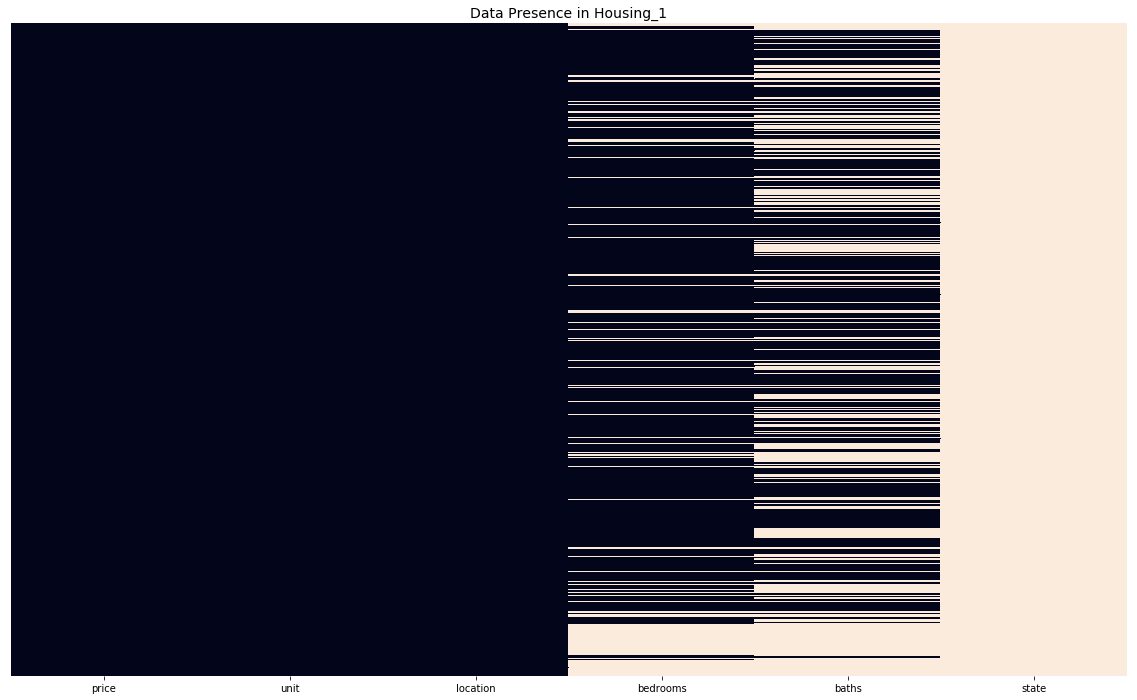

In [13]:
fig,ax = plt.subplots(figsize =(20,12))
ax = sns.heatmap(housing_1.isnull(), cbar=False)
ax.set_yticks([])
ax.set_title("Data Presence in Housing_1", fontsize=14)
plt.show()

There are lots of missing values in the bedroom and baths columns while state values are all missing

First, closer look at the price column is required to escertain whether cleaning should be done

In [14]:
housing_1["price"].value_counts().head()

                    36
₦35,000,000.00      19
₦65,000,000.00      13
₦150,000,000.00     13
₦45,000,000.00      12
Name: price, dtype: int64

The price column needs to be cleaned. The strategy to use is:
1. remove rows where prices are wholely strings
2. remove special charaters in price and where there are no price values, make the price 0.
3. convert all prices to floats
4. convert non-naira prices to naira by multiplying them with the current exchange rate
4. convert all the prices rendered as payment in months or days to price in years

The only string in the price column is "Per Month"

In [15]:
housing_1.drop(housing_1[housing_1["price"] == " per month"].index, inplace =True)

In [16]:
housing_1 =housing_1.reset_index(drop =True)

In [17]:
housing_1["price"] = housing_1["price"].str.replace("₦", "").str.replace("$", "").str.replace(",", "").str.replace("Per Year", "").str.replace("per month", "").str.replace("Per day", "").str.replace(" ", "0").str.strip()

In [18]:
housing_1["price"] = housing_1["price"].astype(float)

In [19]:
housing_1.head()

,price,unit,location,bedrooms,baths,state
0,2620000.0,"₦2,620,000.00 Per Year",", 7 obasa street, Oba-Akran, Ikeja, Lagos, Nig...",NaN,NaN,NaN
1,2500000.0,"₦2,500,000.00",", Tudu wada, Karshi,, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
2,300000.0,"₦300,000.00",", ukeh, masaka, mararba, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
3,0.0,,", World Trade Center, Plot 1113, Constitution ...",2.0,NaN,NaN
4,0.0,,", World Trade Center, Plot 1113, Constitution ...",1.0,NaN,NaN


For price in US dollars, we convert to Naira using an exchange rate of 1USD = # 360

In [20]:
housing_1.loc[housing_1['unit'].str.contains(r'[$]'),'price'] = housing_1.loc[housing_1['unit'].str.contains(r'[$]'),'price']*360

The corresponding entries in the unit column is used to convert price labeled per day and per month to yearly price but first, all other strings from the unit column needs to be removed so that we are either left with "year", "month" or "day"

In [21]:
housing_1["unit"] = housing_1["unit"].str.split(" ").str[-1]

In [22]:
housing_1["unit"].value_counts(dropna = False)

         503
Year     226
day       12
month     10
Name: unit, dtype: int64

In [23]:
housing_1[["price","unit"]].head(10)

,price,unit
0,2620000.0,Year
1,2500000.0,
2,300000.0,
3,0.0,
4,0.0,
5,0.0,
6,0.0,
7,33000000.0,
8,30000000.0,
9,3750000.0,Year


It is obvious that some of the prices do not have a corresponding entry in the unit column. 

A function is created to handle the conversion. The values generated from the function are wrtiten into a new column called multiplier and then the multiplier column is used to multiply the price column. 

In [24]:
def convert(string):
    if string == "month":
        return 12
    elif string == "day":
        return 365
    elif string == "Year":
        return 1
    else:
        return 1

In [25]:
housing_1["multiplier"] = housing_1["unit"].apply(convert)

In [26]:
housing_1["price"] = housing_1["multiplier"] * housing_1["price"]

In [27]:
housing_1.head(10)

,price,unit,location,bedrooms,baths,state,multiplier
0,2620000.0,Year,", 7 obasa street, Oba-Akran, Ikeja, Lagos, Nig...",NaN,NaN,NaN,1
1,2500000.0,,", Tudu wada, Karshi,, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN,1
2,300000.0,,", ukeh, masaka, mararba, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN,1
3,0.0,,", World Trade Center, Plot 1113, Constitution ...",2.0,NaN,NaN,1
4,0.0,,", World Trade Center, Plot 1113, Constitution ...",1.0,NaN,NaN,1
5,0.0,,", World Trade Center, Plot 1113, Constitution ...",3.0,NaN,NaN,1
6,0.0,,", 474, A0, Cadastral zone, Constitution Avenue...",NaN,NaN,NaN,1
7,33000000.0,,", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,5f,NaN,1
8,30000000.0,,", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,7f,NaN,1
9,3750000.0,Year,", jabi by eco bank, Jabi, Abuja FCT, Nigeria",3.0,3f,NaN,1


There are rows were prices have been set to 0. A check of how much of our data in percent is affected by a 0 price is done to see whether they can be dropped.

In [28]:
(housing_1["price"]== 0).sum()/housing_1.shape[0]

0.055925432756324903

Since only about 6% of data is affected, rows where price = 0 is dropped

In [29]:
housing_1.drop(housing_1[housing_1["price"] == 0.0].index, axis =0, inplace = True)

In [30]:
housing_1 = housing_1.reset_index(drop =True)

In [31]:
housing_1.shape[0]

709

Done using the multiplier column and so it is dropped.

In [32]:
housing_1.drop(["multiplier"], axis=1, inplace = True)

In [33]:
housing_1.head()

,price,unit,location,bedrooms,baths,state
0,2620000.0,Year,", 7 obasa street, Oba-Akran, Ikeja, Lagos, Nig...",NaN,NaN,NaN
1,2500000.0,,", Tudu wada, Karshi,, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
2,300000.0,,", ukeh, masaka, mararba, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
3,33000000.0,,", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,5f,NaN
4,30000000.0,,", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,7f,NaN


### Extration of states from the Location column

A function is defined to handle this job. It will be applied to the location column and the output will be saved in the state column.

In [34]:
def find_state(string):
    list =["Lagos", "Abuja", "Rivers", "Cross River", "Ogun", "Oyo", "Delta"]
    for a in list:
        if a in string:
            return a
        elif "Nasaruwa" in string:
            return "Nasarawa"
        elif "Port Harcourt" in string:
            return "Rivers"
        elif "Kuje" in string:
            return "Abuja"
        else:
            pass

In [35]:
housing_1["state"] = housing_1["location"].apply(find_state)

In [36]:
housing_1.loc[housing_1["state"].isnull()].head()

,price,unit,location,bedrooms,baths,state
7,150000000.0,,", Oduduwa Crescent, Nigeria",4.0,4f,None
8,5500000.0,Year,", Oduduwa Crescent, Nigeria",4.0,4f,None
9,48000000.0,,", Nigeria",3.0,3f,None
16,55000000.0,,", Nigeria",4.0,4f,None
20,50000000.0,,", Nigeria",4.0,4f,None


A few states still have missing values. For these, researching the addresses showed they all belong to Lagos. So Lagos is filled in

In [37]:
housing_1.loc[housing_1["state"].isnull(),"state"] ="Lagos"

In [38]:
housing_1["state"].value_counts(dropna =False)

Lagos          609
Abuja           66
Ogun            15
Oyo             11
Rivers           4
Nasarawa         2
Delta            1
Cross River      1
Name: state, dtype: int64

### Cleaning location and unit columns

In [39]:
housing_1["location"].head()

0    , 7 obasa street, Oba-Akran, Ikeja, Lagos, Nig...
1        , Tudu wada, Karshi,, Karu, Nasaruwa, Nigeria
2     , ukeh, masaka, mararba, Karu, Nasaruwa, Nigeria
3    , Alafia Bus stop, Badagry Express Way, Lagos,...
4    , Alafia Bus stop, Badagry Express Way, Lagos,...
Name: location, dtype: object

In [40]:
housing_1["unit"].value_counts().head()

         467
Year     220
day       12
month     10
Name: unit, dtype: int64

For the location column, we require just the city. We do a split and extract the city where possible.

Since all prices are now in years, the unit columns should have only "Per Year"

In [41]:
housing_1["location"] = housing_1["location"].str.split(",").str[2]

In [42]:
housing_1["unit"] ="Per Year"

In [43]:
housing_1.loc[housing_1["location"].isnull()].head()

,price,unit,location,bedrooms,baths,state
9,48000000.0,Per Year,NaN,3.0,3f,Lagos
16,55000000.0,Per Year,NaN,4.0,4f,Lagos
20,50000000.0,Per Year,NaN,4.0,4f,Lagos
28,850000.0,Per Year,NaN,0.0,NaN,Lagos
37,28000000.0,Per Year,NaN,0.0,NaN,Lagos


In [44]:
housing_1.loc[housing_1["location"].isnull(),"state"]

9      Lagos
16     Lagos
20     Lagos
28     Lagos
37     Lagos
38     Lagos
43     Lagos
44     Lagos
45     Lagos
50     Lagos
138    Lagos
430    Lagos
474    Lagos
635    Lagos
Name: state, dtype: object

We still have missing locations but it all corresponds with Lagos state. So we fill in lagos for them.

In [45]:
housing_1["location"].fillna("Lagos", inplace= True)

The columns are renamed to make them descriptive and final file is saved with a different name.

In [46]:
housing_1.rename(columns={"price": "price_naira", "location" :"city_location"},inplace =  True)

In [47]:
housing_1_cleaned = housing_1

The cleaned version of the dataset is inspected to ensure being on the right track.

In [48]:
housing_1_cleaned.head()

,price_naira,unit,city_location,bedrooms,baths,state
0,2620000.0,Per Year,Oba-Akran,NaN,NaN,Lagos
1,2500000.0,Per Year,Karshi,NaN,NaN,Nasarawa
2,300000.0,Per Year,masaka,NaN,NaN,Nasarawa
3,33000000.0,Per Year,Badagry Express Way,5.0,5f,Lagos
4,30000000.0,Per Year,Badagry Express Way,8.0,7f,Lagos


In [49]:
housing_1_cleaned.isnull().sum()

price_naira        0
unit               0
city_location      0
bedrooms         114
baths            287
state              0
dtype: int64

# Exploring the 2nd Dataset

In [50]:
housing_2.head()

,price,unit,location,bedrooms,baths,state
0,"₦1,200,000",per Year,"Enugu,Enugu North,NIGERIA",3,4,NaN
1,"₦600,000",per Year,"Enugu,Enugu East,NIGERIA",2,2,NaN
2,"₦500,000",per Year,"Enugu,Enugu North,NIGERIA",3,3,NaN
3,"₦400,000",per Year,"Enugu,Enugu North,NIGERIA",2,2,NaN
4,"₦800,000",per Year,"Enugu,Enugu East,NIGERIA",3,3,NaN


renaming some columns and checking for :
1. missing values
2. columns were cleaning are needed

In [51]:
housing_2.rename(columns={"price": "price_naira", "location" :"city_location"},inplace =  True)

In [52]:
housing_2.isnull().sum()

price_naira      0
unit             0
city_location    0
bedrooms         0
baths            0
state            7
dtype: int64

In [53]:
housing_2["price_naira"].unique()

array(['₦1,200,000', '₦600,000', '₦500,000', '₦400,000', '₦800,000', '₦0',
       '₦300,000'], dtype=object)

In [54]:
housing_2["unit"].unique()

array(['per Year'], dtype=object)

The following steps are taken:
1. Remove special characters from price and converting to float
2. populate the state columns with values extracted from location
3. extract of cities from location and overwritting the original location columns with extracted values
4. check for null values in the dataset and if dataset is cleaned, save it with a new name

In [55]:
housing_2["price_naira"] = housing_2["price_naira"].str.replace("₦", "").str.replace(",", "").astype(float)

In [56]:
housing_2["state"] = housing_2["city_location"].str.split(",").str[0]

In [57]:
housing_2["city_location"] = housing_2["city_location"].str.split(",").str[1]

In [58]:
housing_2.isnull().sum()

price_naira      0
unit             0
city_location    0
bedrooms         0
baths            0
state            0
dtype: int64

In [59]:
housing_2_cleaned = housing_2

# Exploring and cleaning Dataset 3

In [60]:
housing_3.head()

,price,unit,location,bedrooms,baths,state
0,"1,000,000",per Year,"15 - 17 Bolaji Balogun Street, Ayonusi Estate,...",5.0,6.0,Lagos
1,"600,000",per Year,"15 - 17 Bolaji Balogun Street, Ayonusi Estate,...",3.0,3.0,Lagos
2,"250,000",per Year,"badore,owode and addo roads,",1.0,1.0,Lagos
3,"1,000,000",per Year,"ilupeju,",3.0,2.0,Lagos
4,"600,000",per Year,"badore road,",NaN,NaN,Lagos


check for null values and columns to clean in the dataset. 

In [61]:
housing_3.isnull().sum()

price       0
unit        0
location    0
bedrooms    2
baths       3
state       0
dtype: int64

In [62]:
housing_3["price"].unique()

array(['1,000,000', '600,000', '250,000', '400,000', '3,700,000', '100',
       '12,500,000', '1,500,000', '15', '15,000,000', '1,700,000',
       '85,000', '2,500,000', '360,000', '10', '2,200,000', '3,300,000'], dtype=object)

In [63]:
housing_3["state"].unique()

array(['Lagos', 'Rivers', 'Ogun'], dtype=object)

Renaming columns and cleaning the price_naira and city _ location columns

In [64]:
housing_3.rename(columns={"price": "price_naira", "location" :"city_location"},inplace =  True)

In [65]:
housing_3["price_naira"] = housing_3["price_naira"].str.replace(",", "").astype(float)

In [66]:
housing_3["city_location"] = housing_3["city_location"].str.split(",").str[-2]

In [67]:
housing_3.head()

,price_naira,unit,city_location,bedrooms,baths,state
0,1000000.0,per Year,Old Shagamu Road,5.0,6.0,Lagos
1,600000.0,per Year,Lagos,3.0,3.0,Lagos
2,250000.0,per Year,owode and addo roads,1.0,1.0,Lagos
3,1000000.0,per Year,ilupeju,3.0,2.0,Lagos
4,600000.0,per Year,badore road,NaN,NaN,Lagos


There are no missing values except in the bedroom column. This will be handled later after the dataset are combined

In [68]:
housing_3_cleaned = housing_3

# Cleaning Dataset 4

In [69]:
housing_4.head()

,price,unit,location,bedrooms,baths,parking_lots,state
0,\r\r\n ₦ 8 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"1c Fatai Durosinmi-Etiti Cres, Lagos Island We...",5.0,4,1,Lagos
1,\r\r\n ₦ 3 200 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"IKOTA, Lekki, Lekki",4.0,4,NaN,Lagos
2,\r\r\n ₦ 2 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"IKATE, Lekki, Lekki",2.0,2,NaN,Lagos
3,\r\r\n ₦ 2 500 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"ONIRU, Victoria Island, Lekki",3.0,3,NaN,Lagos
4,\r\r\n ₦ 18 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"BANANA ISLAND ESTATE, Ikoyi-obalende, Ikoyi-ob...",3.0,3,NaN,Lagos


In [70]:
housing_4.isnull().sum()

price             0
unit              2
location          5
bedrooms         42
baths            50
parking_lots    321
state             0
dtype: int64

### I do some cleaning on this dataset by:
1. droping the parking lots column since we don't need it for our analysis
2. renaming the price and locations columns
3. cleaning price and convert to float numbers
3. removing null values from city_location and units

In [71]:
housing_4.drop("parking_lots", axis =1, inplace = True)

In [72]:
housing_4.rename(columns={"price": "price_naira", "location" :"city_location"},inplace =  True)

In [73]:
housing_4["price_naira"] = housing_4["price_naira"].str.split("\r\r\n").str[1].str.replace("₦","").str.replace(r"[\s+]","").str.strip()

In [74]:
housing_4["price_naira"] =housing_4["price_naira"].astype(float)

In [75]:
housing_4.head()

,price_naira,unit,city_location,bedrooms,baths,state
0,8000000.0,\r\r\n Per Year\r\r\n ...,"1c Fatai Durosinmi-Etiti Cres, Lagos Island We...",5.0,4,Lagos
1,3200000.0,\r\r\n Per Year\r\r\n ...,"IKOTA, Lekki, Lekki",4.0,4,Lagos
2,2000000.0,\r\r\n Per Year\r\r\n ...,"IKATE, Lekki, Lekki",2.0,2,Lagos
3,2500000.0,\r\r\n Per Year\r\r\n ...,"ONIRU, Victoria Island, Lekki",3.0,3,Lagos
4,18000000.0,\r\r\n Per Year\r\r\n ...,"BANANA ISLAND ESTATE, Ikoyi-obalende, Ikoyi-ob...",3.0,3,Lagos


The unit column obviously require cleaning. I extract the neccessary words form each entry and check the unique values in the column to check adnormalities

In [76]:
housing_4["unit"] = housing_4["unit"].str.split("\r\r\n").str[1].str.strip()

In [77]:
housing_4["unit"].unique()

array(['Per Year', 'Per m²', 'Per Month', nan, 'Per Day'], dtype=object)

In [78]:
(housing_4["unit"]=="Per m²").sum()/housing_4.shape[0]

0.029411764705882353

Rows whose units are in Per squared meters needs to be dropped since the size of the property is not given. only about 2% of our data fall in this category so it is safe to drop them.

In [79]:
housing_4.drop(housing_4[housing_4["unit"]=="Per m²"].index, axis =0, inplace =True)

In [80]:
housing_4 =housing_4.reset_index(drop =True)

In [81]:
housing_4["unit"].unique()

array(['Per Year', 'Per Month', nan, 'Per Day'], dtype=object)

All prices should be yearly so the prices needs to be converted using the unit column.

In [82]:
housing_4.loc[housing_4['unit'] =="Per Month","price_naira"] = housing_4.loc[housing_4['unit'] =="Per Month","price_naira"]*12

In [83]:
housing_4.loc[housing_4['unit'] =="Per Day","price_naira"] = housing_4.loc[housing_4['unit'] =="Per Day","price_naira"]*365

In [84]:
housing_4.loc[housing_4['unit'].isnull()]

,price_naira,unit,city_location,bedrooms,baths,state
78,20000000.0,NaN,"Asokoro, Asokoro",6.0,8,Abuja
121,500000000.0,NaN,"Maitama, Maitama",6.0,8,Abuja


There are 2 null values in the unit column corresponding to Abuja. I get the mode of the units for Abuja and use it to fill it in and then change all unit values to Per Year

In [85]:
housing_4.loc[housing_4['state']=="Abuja","unit"].mode()

0    Per Year
dtype: object

In [86]:
housing_4.loc[housing_4['unit'].isnull(),"unit"]="Per Year"

In [87]:
housing_4['unit']="Per Year"

In [88]:
housing_4.isnull().sum()

price_naira       0
unit              0
city_location     5
bedrooms         28
baths            36
state             0
dtype: int64

I find were the city_location is missing in the dataset and fill it in with the corresponding states. Also I extract cities from location and overwrite location with the extracted city names.

In [89]:
housing_4.loc[housing_4['city_location'].isnull(),"city_location"] = housing_4.loc[housing_4['city_location'].isnull(),"state"]

In [90]:
housing_4['city_location'] = housing_4['city_location'].str.split(",").str[-1]

In [91]:
housing_4["state"].value_counts()

Lagos     471
Abuja     105
Ogun        5
Imo         4
Ebonyi      4
Kaduna      3
Enugu       2
Name: state, dtype: int64

In [92]:
housing_4.isnull().sum()

price_naira       0
unit              0
city_location     0
bedrooms         28
baths            36
state             0
dtype: int64

In [93]:
housing_4_cleaned = housing_4

# Cleaning the 5th Dataset

In [94]:
housing_5.head()

,price,unit,location,bedrooms,baths,parking_lots,state
0,"₦4,500,000",per year,"Ikoyi, Lagos",2,2,NaN,"Ikoyi, Lagos"
1,"₦15,000,000",per year,"Ikoyi, Lagos",4,4,NaN,"Ikoyi, Lagos"
2,"₦15,000,000",per year,"Ikoyi, Lagos",3,4,NaN,"Ikoyi, Lagos"
3,"₦6,000,000",per year,"Ikoyi, Lagos",2,2,NaN,"Ikoyi, Lagos"
4,"₦13,000,000",per year,"Ikoyi, Lagos",3,4,NaN,"Ikoyi, Lagos"


In [95]:
housing_5.isnull().sum()

price             0
unit              0
location          1
bedrooms          0
baths             0
parking_lots    378
state             1
dtype: int64

Parking_lot column needs to be drop since I don't need it. 

I make column names more descriptive by renaming and check columns to ascertain whether cleaning is required

In [96]:
housing_5.drop("parking_lots", axis=1, inplace =True)

In [97]:
housing_5.rename(columns={"price": "price_naira", "location" :"city_location"},inplace =  True)

In [98]:
housing_5["price_naira"].head()

0     ₦4,500,000 
1    ₦15,000,000 
2    ₦15,000,000 
3     ₦6,000,000 
4    ₦13,000,000 
Name: price_naira, dtype: object

Removing characters from the price and converting to float.

In [99]:
housing_5["price_naira"] = housing_5["price_naira"].str.replace("₦","").str.replace(",","").str.strip().astype(float)

Above, it is seen that our city_location has one null value. We look at this more closely.

In [100]:
housing_5[housing_5["city_location"].isnull()]

,price_naira,unit,city_location,bedrooms,baths,state
122,2200000.0,per year,NaN,3,3,NaN


since we don't have the corresponding state for this city, I'll drop the row

In [101]:
housing_5.drop(housing_5[housing_5["city_location"].isnull()].index, axis =0, inplace =True)

In [102]:
housing_5 =housing_5.reset_index(drop =True)

checking the state column

In [103]:
housing_5["state"].value_counts()

Lekki, Lagos                   268
Ikoyi, Lagos                    49
Victoria Island (VI), Lagos     45
Ajah, Lagos                      7
Apo, Abuja                       2
Apapa, Lagos                     2
Port Harcourt, Rivers            1
Egbe, Lagos                      1
Durumi, Abuja                    1
Idimu, Lagos                     1
Name: state, dtype: int64

In a few rows, have other strings in combination with state name. I clean this up to leave just the state name.

In [104]:
housing_5["state"] = housing_5["state"].str.split(",").str[1]

In [105]:
housing_5["state"].value_counts()

 Lagos     373
 Abuja       3
 Rivers      1
Name: state, dtype: int64

In [106]:
housing_5["unit"].unique()

array(['per year', 'per sqm', 'per day'], dtype=object)

I have to remove rows with price calculated per sqr metre but first, I find out how many percent our data has this issue

In [107]:
(housing_5["unit"]=="per sqm").sum()/housing_5.shape[0]

0.018567639257294429

only about 2% is affected so I go ahead and drop the rows

In [108]:
housing_5.drop(housing_5[housing_5["unit"]=="per sqm"].index, axis =0, inplace=True)

In [109]:
housing_5 =housing_5.reset_index(drop =True)

The price column needs to reflect only yearly price. This means converting daily price to yearly price. secondly, the unit column will have to be "Per Year" all through.

In [110]:
housing_5.loc[housing_5['unit'] =="per day","price_naira"] = (housing_5.loc[housing_5['unit'] =="per day","price_naira"] *365)

In [111]:
housing_5['unit'] ="Per Year"

Finally, I extract cities from the location column, check if there are still any null values and save the dataset with another name.

In [112]:
housing_5["city_location"] = housing_5["city_location"].str.split(",").str[0]

In [113]:
housing_5["city_location"].value_counts()

Lekki                   262
Ikoyi                    49
Victoria Island (VI)     44
Ajah                      7
Apo                       2
Apapa                     2
Port Harcourt             1
Durumi                    1
Egbe                      1
Idimu                     1
Name: city_location, dtype: int64

In [114]:
housing_5.isnull().sum()

price_naira      0
unit             0
city_location    0
bedrooms         0
baths            0
state            0
dtype: int64

In [115]:
housing_5_cleaned = housing_5

# 6th Dataset Exploration and Cleaning

In [116]:
housing_6.head()

,price,unit,location,bedrooms,baths,state
0,"₦ 5,000 / Per Event","₦ 5,000 / Per Event",LAGOS/Ikeja,NaN,NaN,NaN
1,"₦ 45,000 / Yearly","₦ 45,000 / Yearly",ABUJA (FCT)/Dutse Makaranta,1.0,NaN,NaN
2,"₦ 45,000 / Yearly","₦ 45,000 / Yearly",ABUJA (FCT)/Dutse Makaranta,1.0,NaN,NaN
3,"₦ 50,000 / Yearly","₦ 50,000 / Yearly",ABUJA (FCT)/Dutse Sokale,1.0,NaN,NaN
4,"₦ 65,000 / Yearly","₦ 65,000 / Yearly",ABUJA (FCT)/Dutse Alhaji,1.0,NaN,NaN


In [117]:
housing_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
price       228 non-null object
unit        228 non-null object
location    228 non-null object
bedrooms    223 non-null float64
baths       0 non-null float64
state       0 non-null float64
dtypes: float64(3), object(3)
memory usage: 11.7+ KB


In [118]:
housing_6.isnull().sum()

price        19
unit         19
location     19
bedrooms     24
baths       247
state       247
dtype: int64

There are missing values in all columns but first I start with renaming the columns and cleaning the prices.

In [119]:
housing_6.rename(columns={"price":"price_naira","location":"city_location"},inplace = True)

In [120]:
housing_6["price_naira"].unique()[:10]

array(['₦ 5,000 / Per Event', '₦ 45,000 / Yearly', '₦ 50,000 / Yearly',
       '₦ 65,000 / Yearly', '₦ 80,000 / Yearly', '₦ 100,000 / Yearly',
       '₦ 120,000 / Yearly', '₦ 130,000 / Yearly', nan,
       '₦ 150,000 / Yearly'], dtype=object)

I remove all special characters and convert to float. Also, I check the missing values in price and see if we can get the values from the corresponding units in the unit column

In [121]:
housing_6["price_naira"] = housing_6["price_naira"].str.split("/").str[0].str.replace("₦","").str.replace(",","").str.replace(" ","").str.strip().astype(float)

In [122]:
housing_6.loc[housing_6["price_naira"].isnull(),"unit"]

12     NaN
25     NaN
38     NaN
51     NaN
64     NaN
77     NaN
90     NaN
103    NaN
116    NaN
129    NaN
142    NaN
155    NaN
168    NaN
181    NaN
194    NaN
207    NaN
220    NaN
233    NaN
246    NaN
Name: unit, dtype: object

Since the units are also missing, drop the rows where price is missing and reset the index.

In [123]:
housing_6.drop(housing_6[housing_6["price_naira"].isnull()].index, axis = 0, inplace = True)

In [124]:
housing_6.reset_index(drop=True, inplace=True)

Inspecting the unit column.

In [125]:
housing_6["unit"].head()

0    ₦ 5,000 / Per Event
1      ₦ 45,000 / Yearly
2      ₦ 45,000 / Yearly
3      ₦ 50,000 / Yearly
4      ₦ 65,000 / Yearly
Name: unit, dtype: object

In [126]:
housing_6["unit"] = housing_6["unit"].str.split("/").str[1].str.strip()

In [127]:
housing_6[housing_6["unit"]=="Per Event"]

,price_naira,unit,city_location,bedrooms,baths,state
0,5000.0,Per Event,LAGOS/Ikeja,NaN,NaN,NaN


Only one of the units is Labelled Per Event. Since it isn't significant, we drop that row

In [128]:
 housing_6.drop(housing_6[housing_6["unit"]=="Per Event"].index, axis =0, inplace = True)

In [129]:
 housing_6 = housing_6.reset_index(drop=True)

In [130]:
housing_6["unit"].unique()

array(['Yearly', 'Monthly', 'Weekly'], dtype=object)

We convert the price values whose units are weekly and monthly to yearly price and then change all values to "Per Year"

In [131]:
housing_6.loc[housing_6["unit"]=="Monthly","price_naira"] = housing_6.loc[housing_6["unit"]=="Monthly","price_naira"]*12

In [132]:
housing_6.loc[housing_6["unit"]=="Weekly","price_naira"] = housing_6.loc[housing_6["unit"]=="Weekly","price_naira"]*52

In [133]:
housing_6["unit"] ="Per Year"

In [134]:
housing_6.head()

,price_naira,unit,city_location,bedrooms,baths,state
0,45000.0,Per Year,ABUJA (FCT)/Dutse Makaranta,1.0,NaN,NaN
1,45000.0,Per Year,ABUJA (FCT)/Dutse Makaranta,1.0,NaN,NaN
2,50000.0,Per Year,ABUJA (FCT)/Dutse Sokale,1.0,NaN,NaN
3,65000.0,Per Year,ABUJA (FCT)/Dutse Alhaji,1.0,NaN,NaN
4,80000.0,Per Year,KANO/taruni,NaN,NaN,NaN


The state need to be extracted from city_location data and filled into the state column.

In [135]:
housing_6["state"] = housing_6["city_location"].str.split("/").str[0].str.split(" ").str[0]

In [136]:
housing_6["city_location"] = housing_6["city_location"].str.split("/").str[1]

In [137]:
housing_6["city_location"].value_counts().head()

Kubwa           26
Dutse Alhaji    23
Dawaki          15
Dutse Sokale    13
Mararaba        13
Name: city_location, dtype: int64

In [138]:
housing_6.isnull().sum()

price_naira        0
unit               0
city_location      0
bedrooms           4
baths            227
state              0
dtype: int64

In [139]:
housing_6_cleaned = housing_6

# We now move to cleaning the 7th Dataset

In [140]:
housing_7.head()

,price,unit,location,bedrooms,baths,state
0,"₦450,000",per Year,"Ogun, Odeda, Ogun State",2,2,NaN
1,"₦150,000",per Year,"Abeokuta, Abeokuta South, Ogun State",1,1,NaN
2,"₦700,000",per Year,"Ogun, Odeda, Ogun State",3,3,NaN
3,"₦250,000",per Year,"Ifo, Ogun State",2,2,NaN
4,"₦200,000",per Year,"Ofada, Obafemi Owode, Ogun State",NaN,NaN,NaN


In [141]:
housing_7.isnull().sum()

price        288
unit           0
location       0
bedrooms     429
baths        429
state       6697
dtype: int64

We have missing values in all columns except bedrooms and baths. However, I rename the column names first and then move into cleaning the prices.

In [142]:
housing_7.rename(columns={"price":"price_naira","location":"city_location"},inplace = True)

In [143]:
housing_7["price_naira"].value_counts().head()

₦2,000,000    300
₦1,500,000    270
₦500,000      245
₦2,500,000    243
₦3,000,000    242
Name: price_naira, dtype: int64

In [144]:
housing_7["price_naira"] = housing_7["price_naira"].str.replace("₦","").str.replace(",","").str.strip().astype(float)

Some of the price values are missing. We check what percentage of our dataset is affected in order to ascertain whether to drop the rows or not

In [145]:
(housing_7["price_naira"].isnull()).sum()/housing_7.shape[0]

0.04300433029714798

4% of the dataset is affeted, so we can safetly delete them

In [146]:
housing_7.drop(housing_7[housing_7["price_naira"].isnull()].index, axis =0, inplace= True)

In [147]:
housing_7 = housing_7.reset_index(drop=True)

Next, we extract the states from the city_location values

In [148]:
housing_7["state"] = housing_7["city_location"].str.split(" ").str[-3]

In [149]:
housing_7["state"].unique()

array(['Ogun', 'Territory', 'Kaduna', 'Enugu', 'Kwara', 'Lagos', 'Imo',
       'Edo', 'Delta', 'River', 'Benue', 'Bayelsa', 'Adamawa', 'Ibom',
       'Rivers', 'Abia', 'Ekiti', 'Oyo', 'Osun', 'Ondo', 'Sokoto',
       'Plateau'], dtype=object)

We need to rename a few of the states to correspond with what we have in the other datasets

In [150]:
housing_7.loc[housing_7["state"]=="Territory","state"] = "Abuja"

In [151]:
housing_7.loc[housing_7["state"]=="River","state"] = "Cross River"

In [152]:
housing_7.loc[housing_7["state"]=="Ibom","state"] = "Akwa Ibom"

In [153]:
housing_7["city_location"] = housing_7["city_location"].str.split(",").str[0]

In [154]:
housing_7.isnull().sum()

price_naira        0
unit               0
city_location      0
bedrooms         351
baths            351
state              0
dtype: int64

In [155]:
housing_7_cleaned = housing_7

In [156]:
combined = pd.concat([housing_1_cleaned,housing_2_cleaned,housing_3_cleaned,housing_4_cleaned,housing_5_cleaned,housing_6_cleaned,housing_7_cleaned])

In [157]:
combined.describe()

,price_naira
count,8.336000e+03
mean,7.845938e+07
std,4.404334e+09
min,0.000000e+00
25%,5.500000e+05
50%,1.500000e+06
75%,4.000000e+06
max,4.000000e+11


In [158]:
(~combined["price_naira"].between(0,50000)).sum()/combined.shape[0]

0.991242802303263

A price between 0 and less than 50,000 per year, isn't reasonable. We can drop the AFFECTED rows price_naira and still preserve 99% of our data

In [159]:
combined.drop(combined[combined["price_naira"].between(0,50000)].index,axis =0, inplace =True)

In [160]:
combined = combined.reset_index(drop =True)

In [161]:
combined.describe()

,price_naira
count,8.179000e+03
mean,7.910593e+07
std,4.445914e+09
min,5.500000e+04
25%,5.900000e+05
50%,1.600000e+06
75%,4.000000e+06
max,4.000000e+11


In [162]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8179 entries, 0 to 8178
Data columns (total 6 columns):
price_naira      8179 non-null float64
unit             8179 non-null object
city_location    8179 non-null object
bedrooms         7724 non-null object
baths            7337 non-null object
state            8179 non-null object
dtypes: float64(1), object(5)
memory usage: 383.5+ KB


There are still missing values in the bedrooms and baths columns

In [163]:
combined[combined["bedrooms"].isnull()].shape[0]

455

In [164]:
combined["bedrooms"].unique()

array([5.0, 8.0, 4.0, 3.0, 0.0, 2.0, 1.0, nan, 12.0, 9.0, 6.0, 7.0, 30.0,
       16.0, 11.0, 10.0, 15.0, 14.0, '2', '3', '1', '12', '7', '4',
       '10 br', '1 br', '5', '2 br', '6', '5 br', '18', '10', '9', '7 br',
       '3 br', '8', '4 br', '6 br', '15', '8 br', '14', '20 br', '11 br',
       '13 br'], dtype=object)

In [165]:
combined["bedrooms"] = combined["bedrooms"].str.split(" ").str[0]

In [166]:
combined["bedrooms"].value_counts(dropna=False)

NaN    2163
3      2122
2      1521
1       947
4       932
5       369
6        60
7        30
10        9
8         8
9         7
12        3
11        2
18        2
20        1
14        1
13        1
15        1
Name: bedrooms, dtype: int64

In [167]:
combined["bedrooms"].fillna("Unknown", inplace =True)

In [168]:
combined["bedrooms"].value_counts()

Unknown    2163
3          2122
2          1521
1           947
4           932
5           369
6            60
7            30
10            9
8             8
9             7
12            3
11            2
18            2
15            1
20            1
13            1
14            1
Name: bedrooms, dtype: int64

We move to the baths column

In [169]:
combined["baths"].unique()

array(['5f', '7f', '4f', '3f', nan, '6f', '2f', '0f', '1f', '10f', '9f',
       '3.5f', 2, 3, 1.0, 4.0, 6.0, '3', '1', '2', '5', '4',
       '\r\r\n                    Floor Size', '7', '14', '8',
       '\r\r\n                    ', '15', '6', '4,5', '9', '11', '4.5',
       '10', '3,5', '3.5', 5, 0, 10, 7, 16, '12', '10 br', '1 br', '2 br',
       '5 br', '18', '7 br', '3 br', '4 br', '6 br', '8 br', '20 br',
       '11 br', '13 br'], dtype=object)

We extract only the integers

In [170]:
combined["baths"] = combined["baths"].str.extract(r'([\d+]*)',expand=False)

In [171]:
combined["baths"].isnull().sum()

1210

We convert all missing and non-integer values to "Unknown"

In [172]:
combined["baths"].fillna("Unknown", inplace=True)

In [173]:
combined.isnull().sum()

price_naira      0
unit             0
city_location    0
bedrooms         0
baths            0
state            0
dtype: int64

In [174]:
combined["city_location"].unique()

array([' Badagry Express Way', ' Nigeria', 'Lagos', ' Ikate',
       ' eleko Lagos', ' Ipaja Road', ' Ipakodo', ' Gudu', ' Gwarinpa',
       ' Ogun', '', ' Ire Akari', ' off Ago Palace Way', ' Egbeda',
       ' Opebi', ' Eti-Osa', ' Lagos - Ibadan Expressway', ' Ikeja',
       ' Alausa', ' Abuja FCT', ' Lekki', ' Adeniyi Jones', ' Ikorodu',
       ' Yaba', ' Lakowe', ' Opposite Lagos Business School',
       ' Ebute Metta', ' Anthony', ' Ibadan',
       ' along Lagos Ibadan express way', ' Sangotedo', ' Ogba',
       ' off Amodu Ojikutu', ' Phase 3', ' Atunrase/Medina/Soluyi',
       ' VI Extension', ' Gbagada', ' UPS/Millenium Estate',
       ' Magodo Phase 1', ' Parkview/Bourdillon', ' Old Ikoyi',
       ' Ikeja GRA', ' Kosofe', ' Ifako-Ijaiye', ' Ajah', ' Oba-Akran',
       ' bordering Asokoro & Guzape', ' Along Akobo-Olorunda Road',
       ' 1(s) crescent', ' Durumi Garki', ' DIPLOMATIC ZONE',
       ' Banana Island', ' 5th & 6th avenue', ' near Oba Elegushi House',
       ' Obalen

A close look at the values in the city_location column shows that some of the values are long and the cities are preceeded by the term - "it's located in". The clean dataset should contain just the cities in the city_location so we remove the preceeding strings

In [175]:
long_cities = combined[combined["city_location"].str.contains(r"located",regex=True)]

In [176]:
combined.loc[combined["city_location"].str.contains(r"located",regex=True),"city_location"]=long_cities["city_location"].str.split(" ").str[-1]

In [177]:
combined["city_location"].unique()

array([' Badagry Express Way', ' Nigeria', 'Lagos', ' Ikate',
       ' eleko Lagos', ' Ipaja Road', ' Ipakodo', ' Gudu', ' Gwarinpa',
       ' Ogun', '', ' Ire Akari', ' off Ago Palace Way', ' Egbeda',
       ' Opebi', ' Eti-Osa', ' Lagos - Ibadan Expressway', ' Ikeja',
       ' Alausa', ' Abuja FCT', ' Lekki', ' Adeniyi Jones', ' Ikorodu',
       ' Yaba', ' Lakowe', ' Opposite Lagos Business School',
       ' Ebute Metta', ' Anthony', ' Ibadan',
       ' along Lagos Ibadan express way', ' Sangotedo', ' Ogba',
       ' off Amodu Ojikutu', ' Phase 3', ' Atunrase/Medina/Soluyi',
       ' VI Extension', ' Gbagada', ' UPS/Millenium Estate',
       ' Magodo Phase 1', ' Parkview/Bourdillon', ' Old Ikoyi',
       ' Ikeja GRA', ' Kosofe', ' Ifako-Ijaiye', ' Ajah', ' Oba-Akran',
       ' bordering Asokoro & Guzape', ' Along Akobo-Olorunda Road',
       ' 1(s) crescent', ' Durumi Garki', ' DIPLOMATIC ZONE',
       ' Banana Island', ' 5th & 6th avenue', ' near Oba Elegushi House',
       ' Obalen

In [178]:
combined.loc[combined["city_location"]=="Asaba","state"]

2038    Cross River
2039    Cross River
2041    Cross River
2045    Cross River
2046    Cross River
Name: state, dtype: object

It is also noticed that Cross River was entered for the city of Asaba. This is wrong. So I replace the state with the correct option, Delta

In [179]:
combined.loc[combined["city_location"]=="Asaba","state"]="Delta"

To maintain consistency, we make all the cities take lowercase

In [180]:
combined["city_location"] = combined["city_location"].str.lower().str.strip()

In [181]:
combined["state"].unique()

array(['Lagos', 'Abuja', 'Ogun', 'Oyo', 'Delta', 'Rivers', 'Cross River',
       'Enugu', 'Kaduna', 'Imo', 'Ebonyi', ' Lagos', ' Abuja', ' Rivers',
       'ABUJA', 'KANO', 'NASARAWA', 'LAGOS', 'Kwara', 'Edo', 'Benue',
       'Bayelsa', 'Adamawa', 'Akwa Ibom', 'Abia', 'Ekiti', 'Osun', 'Ondo',
       'Sokoto', 'Plateau'], dtype=object)

I observe the some states are rendered in lowercase while others are in upper case and we have 3 variations of Lagos state. I handle these with the folllowing lines of code

In [182]:
combined["state"] = combined["state"].str.lower().str.strip()

In [183]:
combined["state"].unique()

array(['lagos', 'abuja', 'ogun', 'oyo', 'delta', 'rivers', 'cross river',
       'enugu', 'kaduna', 'imo', 'ebonyi', 'kano', 'nasarawa', 'kwara',
       'edo', 'benue', 'bayelsa', 'adamawa', 'akwa ibom', 'abia', 'ekiti',
       'osun', 'ondo', 'sokoto', 'plateau'], dtype=object)

In [193]:
combined[combined["city_location"]==""]

,price_naira,unit,city_location,bedrooms,baths,state
15,35000000.0,Per Year,,Unknown,3,lagos
44,1000000.0,Per Year,,Unknown,3,lagos
45,5500000.0,Per Year,,Unknown,Unknown,lagos
145,10000000.0,Per Year,,Unknown,0,lagos
148,100000000.0,Per Year,,Unknown,0,lagos
165,550000000.0,Per Year,,Unknown,0,lagos
168,880000000.0,Per Year,,Unknown,0,lagos
169,760000000.0,Per Year,,Unknown,0,lagos
170,330000000.0,Per Year,,Unknown,0,lagos
173,700000000.0,Per Year,,Unknown,Unknown,lagos


Some places in the city_location have empty values. I fill these in with the corresponding states

In [196]:
combined.loc[combined["city_location"]=="","city_location"]=combined.loc[combined["city_location"]=="","state"]

In [197]:
combined_housing_cleaned = combined

In [198]:
combined_housing_cleaned.head(10)

,price_naira,unit,city_location,bedrooms,baths,state
0,33000000.0,Per Year,badagry express way,Unknown,5,lagos
1,30000000.0,Per Year,badagry express way,Unknown,7,lagos
2,40000000.0,Per Year,badagry express way,Unknown,5,lagos
3,5500000.0,Per Year,nigeria,Unknown,4,lagos
4,48000000.0,Per Year,lagos,Unknown,3,lagos
5,66000000.0,Per Year,ikate,Unknown,4,lagos
6,2700000.0,Per Year,eleko lagos,Unknown,Unknown,lagos
7,10000000.0,Per Year,ipaja road,Unknown,Unknown,lagos
8,350000.0,Per Year,ipakodo,Unknown,3,lagos
9,55000000.0,Per Year,lagos,Unknown,4,lagos


In [199]:
combined_housing_cleaned.to_excel("combined_housing_cleaned.xlsx")